## PCA

![pca](pca2.png)



$$ X_{n \times m} \rightarrow X^{\text{reduced}}_{n \times k},\ \ \  \text{s.t.} \ \ \  k < m$$
                        
$$X_{n \times m} \cdot S_{m\times k} = X^{\text{reduced}}_{n \times k}$$



1. PCA projects data into new feature space, which is a linear combination of the original features
2. Principal components are orthogonal
3. Principal components are ordered from the first to the last with decreasing importance (explained variance)
4. You need to center your data
----

sklearn.decomposition.PCA

* `.components_` - principal components. Every component is a linear combination of the original features 
* `.explained_variance_` and `.explained_variance_ratio_`

## Example Iris

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [3]:
X = X - X.mean(axis=0)

In [4]:
pca = PCA(2)

X_pca = pca.fit_transform(X)

print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [5]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


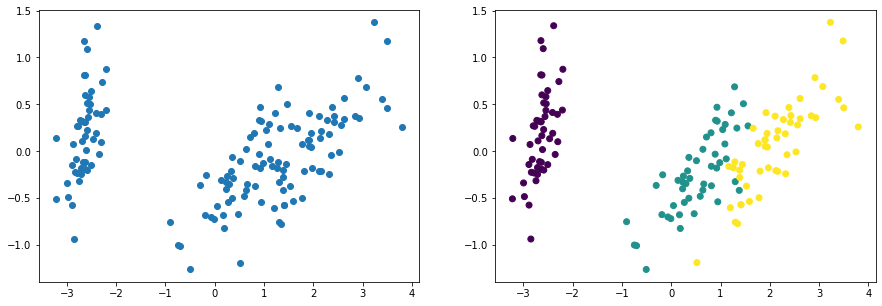

In [6]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].scatter(X_pca[:, 0], X_pca[:, 1]);
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y);

# Apply hierarchical clustering

In [7]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [8]:
clusters = linkage(X_pca, metric='euclidean', method='complete')

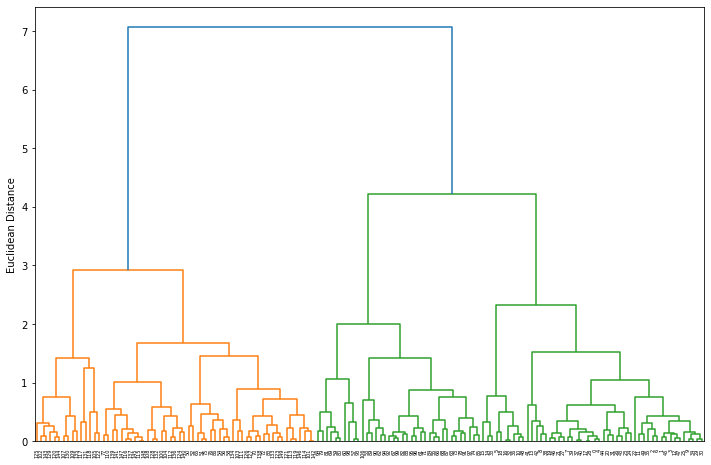

In [9]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
dendr = dendrogram(clusters, ax=ax)

plt.ylabel('Euclidean Distance');

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

In [11]:
ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')

prediction_hierarchical = ac.fit_predict(X_pca)
print(f'Cluster labels: {prediction_hierarchical}')

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 0 2
 2 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [12]:
adjusted_rand_score(y, prediction_hierarchical)

0.7445264308738749

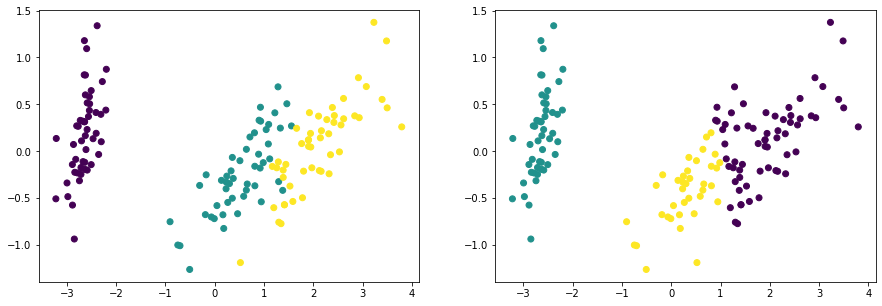

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y);
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=prediction_hierarchical);